<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/notebook/06_03a_Cifar_gray_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cifar10 辨識

## 步驟1：載入 cifar10 資料

In [1]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

# 載入 cifar10 資料
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## 轉成單色

In [2]:
# 轉成單色：rgb_to_grayscale
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)
print(x_train.shape, x_test.shape)

(50000, 32, 32, 1) (10000, 32, 32, 1)


## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [3]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255, x_test / 255

In [4]:
# 確認轉換成功
x_train_norm[0]

<tf.Tensor: shape=(32, 32, 1), dtype=float32, numpy=
array([[[0.23921569],
        [0.1764706 ],
        [0.1882353 ],
        ...,
        [0.5372549 ],
        [0.50980395],
        [0.5058824 ]],

       [[0.07058824],
        [0.        ],
        [0.03921569],
        ...,
        [0.36862746],
        [0.3529412 ],
        [0.36862746]],

       [[0.09411765],
        [0.03137255],
        [0.12156863],
        ...,
        [0.3529412 ],
        [0.35686275],
        [0.3137255 ]],

       ...,

       [[0.6784314 ],
        [0.6039216 ],
        [0.6117647 ],
        ...,
        [0.5254902 ],
        [0.13725491],
        [0.14901961]],

       [[0.57254905],
        [0.5019608 ],
        [0.56078434],
        ...,
        [0.59607846],
        [0.27058825],
        [0.23137255]],

       [[0.5882353 ],
        [0.53333336],
        [0.5764706 ],
        ...,
        [0.7372549 ],
        [0.4862745 ],
        [0.3882353 ]]], dtype=float32)>

## 步驟4：資料分割，此步驟無需進行，載入資料時，已經切割好了

## 步驟5：建立模型結構

## 步驟6：結合訓練資料及模型，進行模型訓練

## 步驟7：評分(Score Model)

In [5]:
# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='relu'),    
    tf.keras.layers.Dense(10)    
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/10
1250/1250 [==============================] - 51s 40ms/step - loss: 1.7398 - accuracy: 0.3737 - val_loss: 1.5184 - val_accuracy: 0.4587
Epoch 2/10
1250/1250 [==============================] - 48s 39ms/step - loss: 1.3762 - accuracy: 0.5178 - val_loss: 1.3170 - val_accuracy: 0.5369
Epoch 3/10
1250/1250 [==============================] - 49s 39ms/step - loss: 1.2126 - accuracy: 0.5756 - val_loss: 1.1847 - val_accuracy: 0.5815
Epoch 4/10
1250/1250 [==============================] - 48s 39ms/step - loss: 1.1146 - accuracy: 0.6137 - val_loss: 1.1246 - val_accuracy: 0.6060
Epoch 5/10
1250/1250 [==============================] - 49s 39ms/step - loss: 1.0365 - accuracy: 0.6400 - val_loss: 1.0752 - val_accuracy: 0.6276
Epoch 6/10
1250/1250 [==============================] - 48s 39ms/step - loss: 0.9663 - accuracy: 0.6647 - val_loss: 1.0324 - val_accuracy: 0.6414
Epoch 7/10
1250/1250 [==============================] - 47s 38ms/step - loss: 0.9213 - accuracy: 0.6815 - val_loss: 1.0270 -

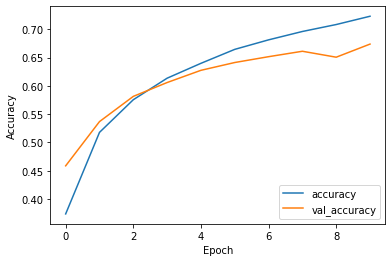

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6